In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
file1=os.path.join("raw_data","city_data.csv")
file2=os.path.join("raw_data","ride_data.csv")
df_citydata=pd.read_csv(file1)
df_ridedata=pd.read_csv(file2)

In [3]:
df_citydata.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [4]:
df_ridedata.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [5]:
grped_ridedata=df_ridedata.groupby('city')
city_ridedata=grped_ridedata['fare'].agg([np.size,np.mean])
city_ridedata1=city_ridedata.reset_index(drop=False)

In [6]:
city_ridedata1.head()

,city,size,mean
0,Alvarezhaven,31.0,23.928710
1,Alyssaberg,26.0,20.609615
2,Anitamouth,9.0,37.315556
3,Antoniomouth,22.0,23.625000
4,Aprilchester,19.0,21.981579


In [7]:
merged_ridedata=pd.merge(df_citydata,city_ridedata1,on="city",how="inner")
merged_ridedata1=merged_ridedata.rename(columns={"size":"Number of Rides","mean":"Average Fare"})
merged_ridedata1.head()

,city,driver_count,type,Number of Rides,Average Fare
0,Kelseyland,63,Urban,28.0,21.806429
1,Nguyenbury,8,Urban,26.0,25.899615
2,East Douglas,12,Urban,22.0,26.169091
3,West Dawnfurt,34,Urban,29.0,22.330345
4,Rodriguezburgh,52,Urban,23.0,21.332609


In [8]:
grped_ridedata=merged_ridedata1.groupby('type')
urban_ridedata=grped_ridedata.get_group('Urban')
suburban_ridedata=grped_ridedata.get_group('Suburban')
rural_ridedata=grped_ridedata.get_group('Rural')
rural_ridedata.head()

,city,driver_count,type,Number of Rides,Average Fare
108,South Elizabethmouth,3,Rural,5.0,28.698000
109,East Troybury,3,Rural,7.0,33.244286
110,Kinghaven,3,Rural,6.0,34.980000
111,New Johnbury,6,Rural,4.0,35.042500
112,Erikport,3,Rural,8.0,30.043750


# Pyber Ride Sharing Data

Text(0.5,1,'Pyber Ride Sharing Data')

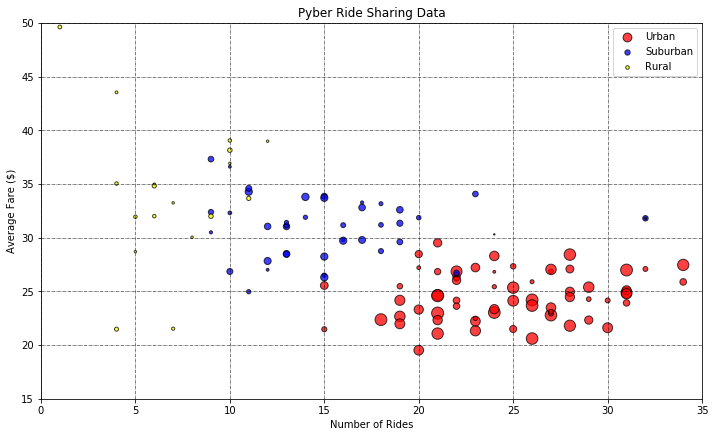

In [9]:
# size=urban_ridedata['driver_count']

ax1=urban_ridedata.plot(kind="scatter",x="Number of Rides",y="Average Fare",marker="o",color="red",edgecolors="black",
                   figsize=(10,6),s=urban_ridedata['driver_count']*2, alpha=0.75,label="Urban")
ax2=suburban_ridedata.plot(kind="scatter",x="Number of Rides",y="Average Fare",marker="o",color="blue",edgecolors="black",
                   s=suburban_ridedata['driver_count']*2, alpha=0.75,label="Suburban",ax=ax1)
ax3=rural_ridedata.plot(kind="scatter",x="Number of Rides",y="Average Fare",marker="o",color="yellow",edgecolors="black",
                   s=rural_ridedata['driver_count']*2, alpha=0.75,label="Rural",ax=ax1)
plt.ylabel('Average Fare ($)')
# plt.figure(figsize=(20,20))
plt.tight_layout()
plt.grid(linestyle='-.',linewidth=0.5,color="black")
plt.xlim(0,35)
plt.ylim(15,50)
plt.title('Pyber Ride Sharing Data')

# Observations:
1. Urban cities have higher number of rides and the average fare is smaller than suburban and rural cities.
2. Rural cities have less number of rides comparatively but average fare is higher.

In [10]:
merged_ridedata1=merged_ridedata1.drop(['city'],axis=1)
merged_ridedata1.head()

,driver_count,type,Number of Rides,Average Fare
0,63,Urban,28.0,21.806429
1,8,Urban,26.0,25.899615
2,12,Urban,22.0,26.169091
3,34,Urban,29.0,22.330345
4,52,Urban,23.0,21.332609


In [11]:
grped_type=merged_ridedata1.groupby('type')
summary_bytype=grped_type.agg([np.sum])
summary_bytype.columns=summary_bytype.columns.get_level_values(0) # change col name from multilevel to single level
summary_bytype


,driver_count,Number of Rides,Average Fare
type,,,
Rural,104,125.0,615.728572
Suburban,638,657.0,1300.433953
Urban,2607,1625.0,1623.863390


# % of Total Fares by City Types

(-1.1191672019216825,
 1.1456662890951792,
 -1.1248597021815654,
 1.1161167749709013)

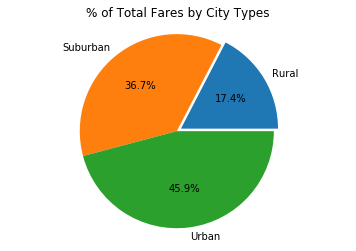

In [12]:
type_list=summary_bytype.keys()
explode=[0.05,0,0]
# pie charts
summary_bytype['Average Fare'].plot(kind="pie",y=type_list,title=("% of Total Fares by City Types"),autopct="%1.1f%%",explode=explode)
plt.ylabel('')
plt.axis('equal')

# % of Total Rides by City Type

# Observations
1. Urban cities account of almost half of the fares.
2. Rural cities account of less than 20% of total fares.

(-1.2004852733810065,
 1.1206733690806177,
 -1.12271377049683,
 1.1174320263889168)

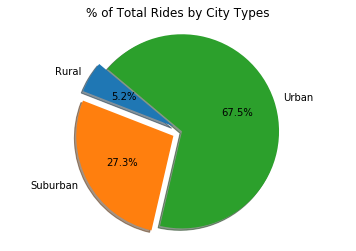

In [13]:
type_list=summary_bytype.keys()
explode=[0.1,0.1,0]
# pie charts
summary_bytype['Number of Rides'].plot(kind="pie",y=type_list,title=("% of Total Rides by City Types"),
                                       autopct="%1.1f%%",explode=explode,startangle=140,shadow=True)
plt.ylabel('')
plt.axis('equal')

# Observations
1. Almost 70% rides happen in Urban cities
2. Around 5% rides happen in rural cities

# % of Total Drivers by City Type

(-1.115345137522896,
 1.1009514146055572,
 -1.1036403045579604,
 1.1038891570312634)

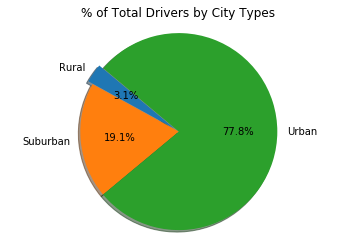

In [14]:
type_list=summary_bytype.keys()
explode=[0.05,0,0]
# pie charts
summary_bytype['driver_count'].plot(kind="pie",y=type_list,title=("% of Total Drivers by City Types"),
                                    autopct="%1.1f%%",explode=explode,startangle=140,shadow=True)
plt.ylabel('')
plt.axis('equal')